In [5]:
import matplotlib.pyplot as plt
import random
import numpy as np
import cvxpy as cp

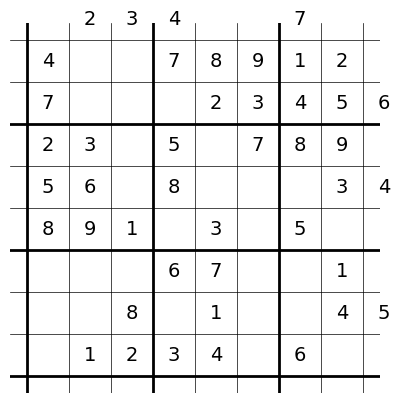

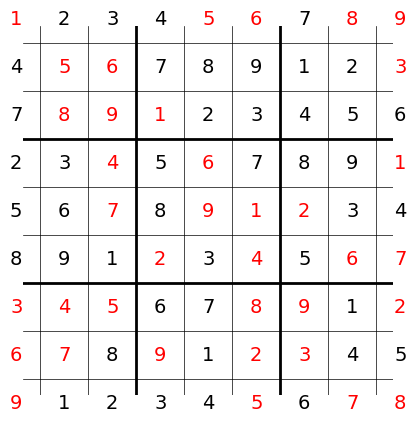

In [6]:
#Création du puzzle
def puzzle():
    figure, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')
    position = [[''] * 9 for _ in range(9)]
    
    for i in range(9):
        lw = 2 if i % 3 == 0 else 0.5
        ax.axhline(i, color='black', lw=lw)
        ax.axvline(i, color='black', lw=lw)

    for i in range(9):
        for j in range(9):
            rand = random.randint(0, 1)
            number = (i * 3 + i // 3 + j) % 9 + 1
            
            if rand == 0:
                position[i][j] = ''
            else:
                position[i][j] = number
                
            ax.text(j + 0.5, 8 - i + 0.5, str(position[i][j]), va='center', ha='center', fontsize=14, color='black')

    plt.show()
    return position

def is_possible(puzzle, row, col, num):
    for i in range(9):
        if puzzle[row][i] == num or puzzle[i][col] == num:
            return False

    for i in range(3):
        for j in range(3):
            if puzzle[3 * (row // 3) + i][3 * (col // 3) + j] == num:
                return False

    return True

def sudoku(puzzle):
    def solve_sudoku(puzzle):
        for row in range(9):
            for col in range(9):
                if puzzle[row][col] == '':
                    for num in range(1, 10):
                        if is_possible(puzzle, row, col, num):
                            puzzle[row][col] = num
                            if solve_sudoku(puzzle):
                                return True
                            puzzle[row][col] = ''
                    return False
        return True

    original_puzzle = [row[:] for row in puzzle]
    solve_sudoku(puzzle)
    draw_sudoku(puzzle, original_puzzle)

def draw_sudoku(puzzle, original_puzzle):
    fig, ax = plt.subplots()
    for i in range(1, 9):
        lw = 2 if i % 3 == 0 else 0.5
        ax.axhline(i, color='black', lw=lw)
        ax.axvline(i, color='black', lw=lw)

    for i in range(9):
        for j in range(9):
            cell_value = puzzle[i][j]
            original_value = original_puzzle[i][j]
            if cell_value != '':
                if original_value != '':
                    ax.text(j + 0.5, 8 - i + 0.5, str(cell_value), va='center', ha='center', fontsize=14, color='black')
                else:
                    ax.text(j + 0.5, 8 - i + 0.5, str(cell_value), va='center', ha='center', fontsize=14, color='red')

    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()


if __name__ == '__main__':
    sudoku(puzzle())

